# Physics 300 
## Computational Physics I (Fall 2018)
## BPB-248, Mon/Wed 02:30 - 03:45 pm 

|Instructor| Prof. Qiang Zhu|
|--|-------------------------------|
|Email | qiang.zhu@unlv.edu|
|Website|http://www.physics.unlv.edu/~qzhu/|
|Office| BPB 232|
|Office hours | Mon/Wed 03:45 - 05:00 pm |


# 15 Local Optmization (I)

Optimization is always a quite frequent case which we will meet everyday. 
It is always interesting and rather important to find the best option for any given model. 
It is in statistics, quantitative finance, risk, operations research, materials design, and other predictive sciences. 

## 15.1 1D example
Let's get started with a simplest example, to find the minima/maxima of a polynomial curve.

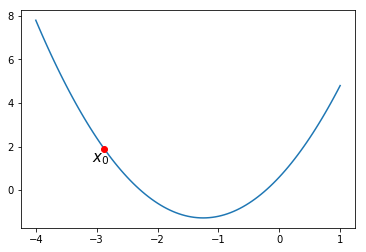

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

A,B,C = 1.2, 3.0, 0.6                         # coefficients of objective functions
x_min, x_max = -4, 1                          # range of x
x0 = x_min + np.random.random()*(x_max-x_min) # randomly pick a point in the given range

f = lambda x: A*x*x + B*x + C

x = np.linspace(-4,1,101)
plt.plot(x,  f(x))
plt.plot(x0, f(x0), 'ro')
plt.text(x0-0.2, f(x0)-0.6, '$x_0$', fontsize=15)

plt.show()


## 15.2 Gradient Descent

Suppose we randomly pick a point $x_0$, How can we get the minimum value in this curve?
A wise way is to follow the derivatives. Let's always go downhill! 
Therefore, we will need some information about the derivatives of each step, and then move it a bit for each step.
$$x_{n+1} = x_n - \gamma f'(x_n)$$

in which $f'$ is the slope and $\gamma$ is the step length.

If $\gamma$ is very small and $f'$ can be acurately calculated. We should be able to get the minimum value soon.

In [8]:
def derivative(f,x, dx=0.1):
    return (f(x+dx)-f(x))/dx

def minimize(f, x0, dx=0.01, N=1000):
    
    x_now = x0
    converged = False
    x_hist = []
    x_hist.append(x0)
    
    for i in range(N):
        x_next = x_now - derivative(f, x_now)*dx
        if f(x_next) < f(x_now):
            x_now = x_next
            x_hist.append(x_now)
            #print('New position: x=', x_now)
        else:
            converged = True
            break
    return converged, x_now, f(x_now), np.array(x_hist)


x0:  -0.18665950229894612    converged:  True    Best solution: x= -1.2503173596425292 f= -1.274999879139429


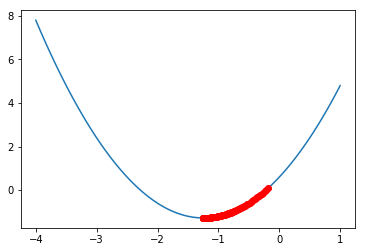

In [9]:
converged, x_best, f_min, x_hist = minimize(f, x0)
print('x0: ', x0, '   converged: ', converged, '   Best solution: x=', x_best, 'f=', f_min)

plt.plot(x,  f(x))
plt.plot(x_hist, f(x_hist), 'ro')
plt.show()


In [10]:
# let's try to pick different random numbers and repeat it for a couple of times

for i in range(10):
    x1 = x_min + np.random.random()*(x_max-x_min)
    converged, x_best, f_min, x_hist = minimize(f, x1)
    print('x1: ', x1, '   converged: ', converged, '   Best solution: x=', x_best, 'f=', f_min)


x1:  -1.9715276817244405    converged:  False    Best solution: x= -1.300000000018918 f= -1.2719999999977296
x1:  -2.936106764139658    converged:  False    Best solution: x= -1.300000000046092 f= -1.271999999994469
x1:  -1.4712323744449343    converged:  False    Best solution: x= -1.300000000004823 f= -1.2719999999994211
x1:  -3.050546762090752    converged:  False    Best solution: x= -1.3000000000493162 f= -1.2719999999940823
x1:  -1.430492400671946    converged:  False    Best solution: x= -1.300000000003675 f= -1.2719999999995588
x1:  -0.3965158954287151    converged:  True    Best solution: x= -1.2498294550256424 f= -1.2749999650972943
x1:  -3.8775518967487423    converged:  False    Best solution: x= -1.3000000000726146 f= -1.2719999999912863
x1:  -1.777591252952416    converged:  False    Best solution: x= -1.3000000000134542 f= -1.2719999999983855
x1:  -1.4442656183761473    converged:  False    Best solution: x= -1.300000000004064 f= -1.2719999999995122
x1:  -1.0043158025727

### Question
Why there is a divergence? 
- When we choose x1 from the left side, it converges at -1.300
- When we choose x1 from the right side, it converges at -1.249


In [24]:
# Here is a bit more complicated way to organize the data with the help of pandas
import pandas as pd

x_init = []
convergence = []
x_bests = []
f_mins = []

for i in range(10):
    x1 = x_min + np.random.random()*(x_max-x_min)
    converged, x_best, f_min, x_hist = minimize(f, x1)
    x_init.append(x1)
    convergence.append(converged)
    x_bests.append(x_best)
    f_mins.append(f_min)
    
    
col_name = {'x0':x_init, 'convergence':convergence, 'x_min':x_bests, 'f_min': f_mins}
df = pd.DataFrame(col_name)


In [25]:
df

,convergence,f_min,x0,x_min
0,False,-1.272924,-0.287467,-1.208410
1,False,-1.257542,0.586177,-1.129383
2,False,-1.252436,0.768690,-1.112873
3,False,-1.210264,-3.314936,-1.482264
4,False,-1.261304,0.433780,-1.143168
5,False,-1.256178,-2.131770,-1.375239
6,False,-1.269735,-0.014963,-1.183760
7,False,-1.264242,-1.794000,-1.344686
8,False,-1.223085,-3.046663,-1.457997
9,False,-1.262447,0.383457,-1.147720


## 15.3 Variable step size


From the above data, it is quite clear that the algorithm is not very efficient and highly sensitive to the choice of
step size $\gamma$. With certain assumptions on the function $F$ and particular choices of $\gamma$  (e.g., chosen either via a line search that satisfies the Wolfe conditions or the Barzilai-Borwein method shown as following):

$$ \gamma_n = \frac{(x_n-x_{n-1})^T [\nabla f(x_n) - \nabla f(x_{n-1})]} {||\nabla f(x_n) - \nabla f(x_{n-1})||^2} $$

For the 1d case, the equation returns to:

$$ \gamma_n = \frac{(x_n-x_{n-1})} {\nabla f(x_n) - \nabla f(x_{n-1}) }  $$

In [11]:
# variable stepwidth

def minimize2(f, x0, N=1000):
    
    x_now = x0
    x_prev = None
    converged = False
    
    for i in range(N):
        if x_prev is None:
            dx = 0.01
        else:
            dfx = derivative(f, x_now) - derivative(f, x_prev)
            dx = (x_now - x_prev)/dfx
        x_next = x_now - derivative(f, x_now)*dx
        
        if f(x_next) < f(x_now):
            x_prev = x_now
            x_now = x_next

        else:
            converged = True
            break
    return converged, x_now, f(x_now)

converged, x_best, f_min = minimize2(f, x0)
print('x0: ', x0, '   converged: ', converged, '   Best solution: x=', x_best, 'f=', f_min)


x0:  -0.18665950229894612    converged:  True    Best solution: x= -1.2999999999999854 f= -1.2720000000000016


In [12]:
# Try many times again
for i in range(10):
    x1 = x_min + np.random.random()*(x_max-x_min)
    converged, x_best, f_min = minimize2(f, x1)
    print('x0: ', x0, '   converged: ', converged, '   Best solution: x=', x_best, 'f=', f_min)

x0:  -0.18665950229894612    converged:  True    Best solution: x= -1.2999999999999872 f= -1.2720000000000011
x0:  -0.18665950229894612    converged:  True    Best solution: x= -1.2999999999999994 f= -1.2720000000000002
x0:  -0.18665950229894612    converged:  True    Best solution: x= -1.2999999999999976 f= -1.2720000000000002
x0:  -0.18665950229894612    converged:  True    Best solution: x= -1.2999999999999714 f= -1.2720000000000034
x0:  -0.18665950229894612    converged:  True    Best solution: x= -1.299999999999827 f= -1.2720000000000207
x0:  -0.18665950229894612    converged:  True    Best solution: x= -1.3 f= -1.2720000000000002
x0:  -0.18665950229894612    converged:  True    Best solution: x= -1.2999999999999958 f= -1.2720000000000007
x0:  -0.18665950229894612    converged:  True    Best solution: x= -1.2999999999999976 f= -1.2720000000000002
x0:  -0.18665950229894612    converged:  True    Best solution: x= -1.299999999999982 f= -1.272000000000002
x0:  -0.18665950229894612   

### Question
Use the pandas library to format the above output

## 15.4 2D example
The above formula could also be extended to 2D, such as the function below,

$$ f(x, y) = x^2/2 + y^2/4$$

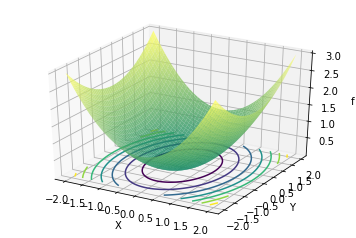

In [28]:
#%matplotlib notebook 

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x_min, x_max = -2, 2                          # range of x
y_min, y_max = -2, 2                          # range of x

def f2(x,y):
    return 1/2*x**2 + 1/4*y**2

nx = np.linspace(x_min,x_max,100)
ny = np.linspace(y_min,y_max,100)

x,y = np.meshgrid(nx,ny)

z = f2(x, y)
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(x,y,z, cmap='summer', alpha=0.8)
cset = ax.contour(x,y,z, zdir='z', offset=0)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f')

plt.show()


## 15.5 Homework

Write a code to solve the minimum of 2D function with Monte Carlo method.
